# Dimensionality Reduction and Clustering
##### Joseph Young

In [80]:
#for package access
import sys
sys.path.append(r'R:\JoePriceResearch\Python\Anaconda3\Lib\site-packages')

#for data access
from sklearn.datasets import fetch_mldata

#for data manipulation
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import f1_score


## Part 1: PCA Dimensionality Reduction
The objective of this section is to perform a pca reduction on the MNIST data.  It is broken down into the following subsections:
 - A. Choosing the number of PCA components
 - B. Plotting the components and trend analysis
 - C. A discussion of PCA
 - D. Image compression and reproduction
 

### A. Choosing the number of PCA Components:

In [22]:
#Upload image data and assign pixel darkness integers to x and y coordinates. 
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

In [23]:
#Creates a simple dimensional reduction with 2 components
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)


In [24]:
#returns the explained variance ratio
pca.explained_variance_ratio_


array([0.09746116, 0.07155445])

Here we see that in a PCA reduction with 2 componets, 9.7% of variance lies along the first principle component and 7.15% along the second. We therefore explain roughly 17% of variance with this PCA. 

The cumulative sum of the explained variance ratio array tells how much of the variance is explained by the addition of each consecutive component. Below we see that on the 154th component, the pca finally accounts for 95% of the variance. 

In [25]:
pca = PCA(n_components=154)
X_2dim = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
cum_ratio

array([0.09746116, 0.16901561, 0.23051091, 0.28454476, 0.3334341 ,
       0.37648637, 0.40926898, 0.4381654 , 0.46574904, 0.48917044,
       0.51023733, 0.53061286, 0.5476835 , 0.5646237 , 0.58045752,
       0.59532097, 0.60851456, 0.6213047 , 0.63317742, 0.64470679,
       0.65536719, 0.66546513, 0.67505665, 0.684153  , 0.69298586,
       0.70137405, 0.70947236, 0.71732954, 0.72473217, 0.73163231,
       0.73819375, 0.74464845, 0.75065664, 0.75651276, 0.7621803 ,
       0.767615  , 0.77266217, 0.77753297, 0.78232252, 0.78699846,
       0.79154214, 0.79599132, 0.80017349, 0.80413513, 0.8079722 ,
       0.81173005, 0.81534432, 0.81883456, 0.82222188, 0.82541884,
       0.82858738, 0.83168883, 0.83465363, 0.83752465, 0.84034978,
       0.84304401, 0.84572793, 0.84829303, 0.85082471, 0.85327119,
       0.85566821, 0.85805402, 0.86034635, 0.86255584, 0.86468645,
       0.86674962, 0.86877744, 0.87072779, 0.87264249, 0.87452798,
       0.87639774, 0.87819878, 0.87996665, 0.88170024, 0.88334

This is acceptable because, as we see below, there are 784 "features" across the 70000 images in the X array. Importantly, the number of components cannot exceed the number of features.

In [26]:
#returns the dimensions of the X array
X.shape

(70000, 784)

This is visually confirmed in the plot of explained variance shown below. We do see heavily diminishing returns at roughly 20 components, but considering that this is a manageably sized dataset, I am not concerned with using more computational power to get more explained variance.

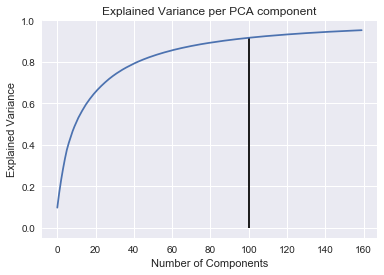

In [27]:
pca = PCA(n_components=160)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.title("Explained Variance per PCA component")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.vlines(ymin=0,ymax=cum_ratio[100],x=100)


### B. Plotting the Components and Trend Analysis

Text(26.8522,0.5,'2nd Component')

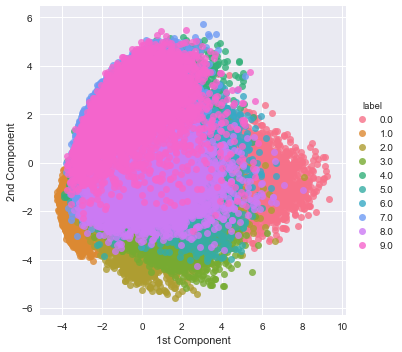

In [28]:
pca_2 = PCA(n_components=2)
princ_comp = pca_2.fit_transform(X)
princ_df = pd.DataFrame(princ_comp, columns=["1st Component", "2nd Component"])
princ_df["label"] = y
sns.lmplot(x="1st Component",y="2nd Component", data=princ_df, hue="label", fit_reg=False)
plt.xlabel("1st Component")
plt.ylabel("2nd Component")

Here we see that after PCA, there is already a visible clustering of different labels. This demonstrates that the first couple components do the lion's share of identification; as the number of components increase, it is certain that these clusters will become even more distinct, but more difficult to visualize (beyond 3 dimensions.)

### C. A Discussion of PCA

PCA aids in addressing the curse of dimensionality. High dimensional data becomes extremely far apart and difficult to analyze. PCA takes the data and projects it onto an axis that maximizes variance. Each consecutive component is orthogonal to the component vectors preceding them, capturing additional variance. This method is effective in shaping the data in a way that can be processed to identify relationships, clusters, and trends within the data. 

 - The drawback of PCA is reduced interpretability of clustering junctures. PCA converts the differences (which would have previously been represented in feature values) into complex linear combinations. So, while the computer can resolve the problem of overfitting and precision, it does so at the expense of communicatable interpretability.

### D. Image Compression and Reproduction

Here I will compare the original images with their pca-compressed, then reproduced counterparts. In order to do so I will first create a function:

In [29]:
#defines a function that will compare 2 images side by side, 1st the original, then the reproduction
def image_comparison(image_number):
    #plots original
    re_pca = pca.inverse_transform(X_pca)
    plt.figure(figsize=(15,10))
    plt.title("Original Image")
    plt.subplot(1,2,1)
    plt.imshow(X[image_number].reshape(28,28))
 
     
    #plots reproduced Image  
    plt.subplot(1,2,2)
    plt.title("Compressed and Reproduced Image")
    plt.imshow(re_pca[image_number].reshape(28,28))

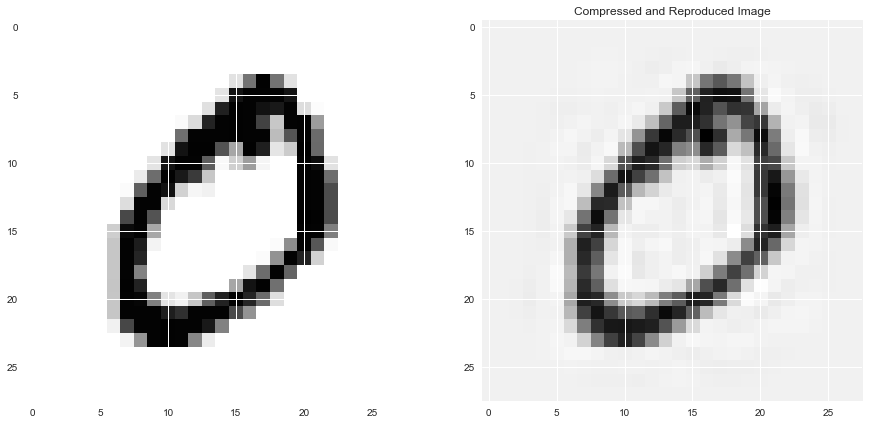

In [30]:
image_comparison(0)

In addition to the above before and after comparisons, I've included a plot of the compressed intermediary 1st and second pca components below:

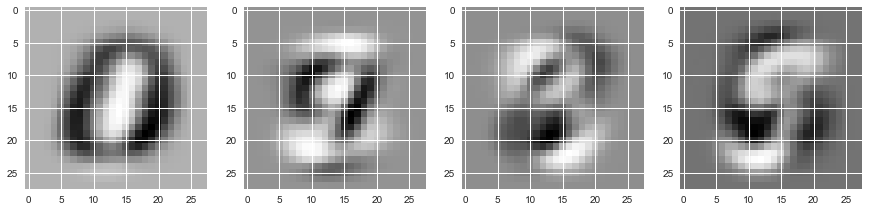

In [31]:
#plots compressed pca
fig, ax = plt.subplots(1,4, figsize=(15,10))

#produces the corresponding images for the first 4 components. 
for i in range(4):
    
    ax[i].imshow(pca.components_[i].reshape(28,28), cmap="Greys")

For additional comparisons, I've included a handful of beginning and after images below:

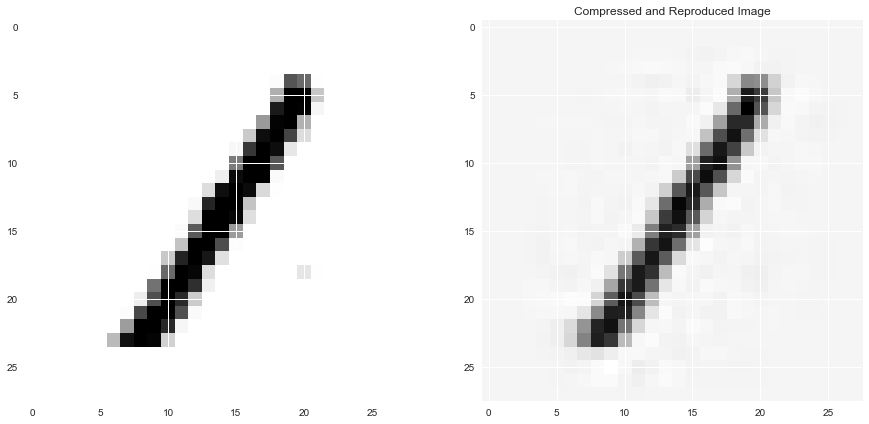

In [32]:
image_comparison(10000)

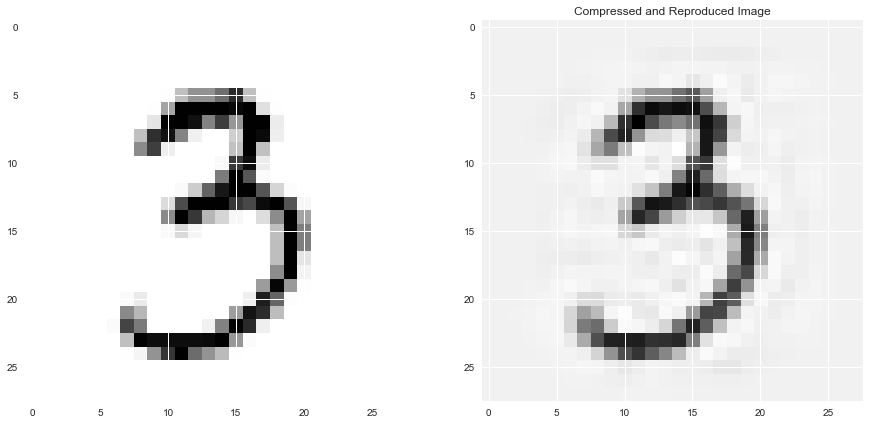

In [33]:
image_comparison(20000)

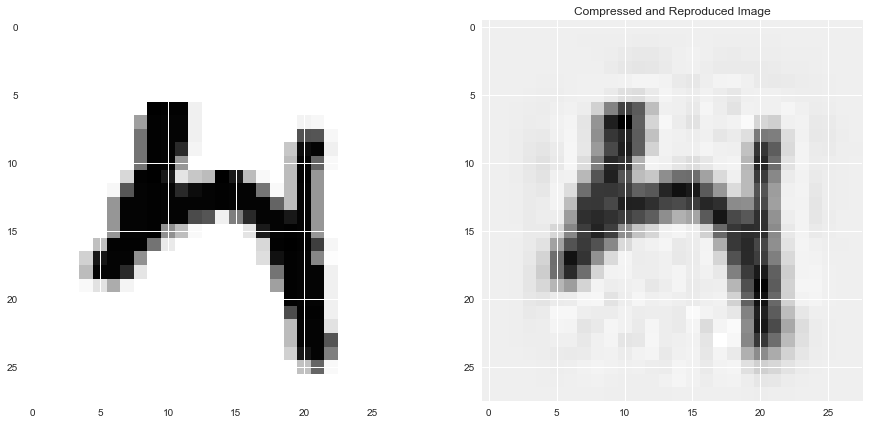

In [34]:
image_comparison(30000)

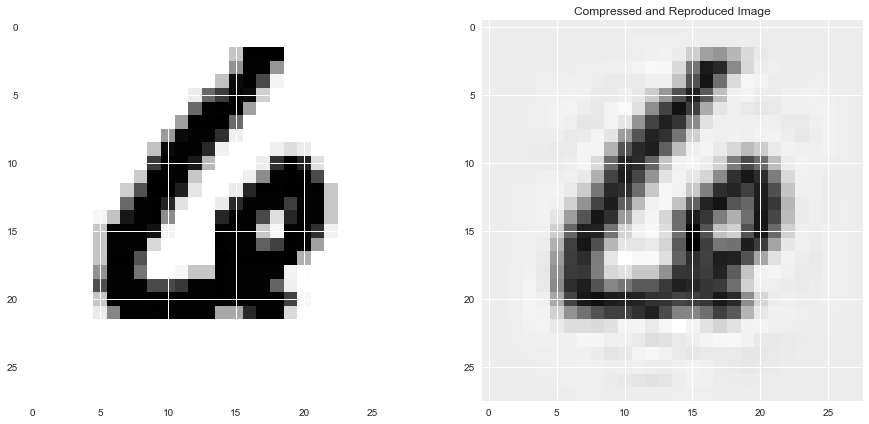

In [35]:
image_comparison(40000)

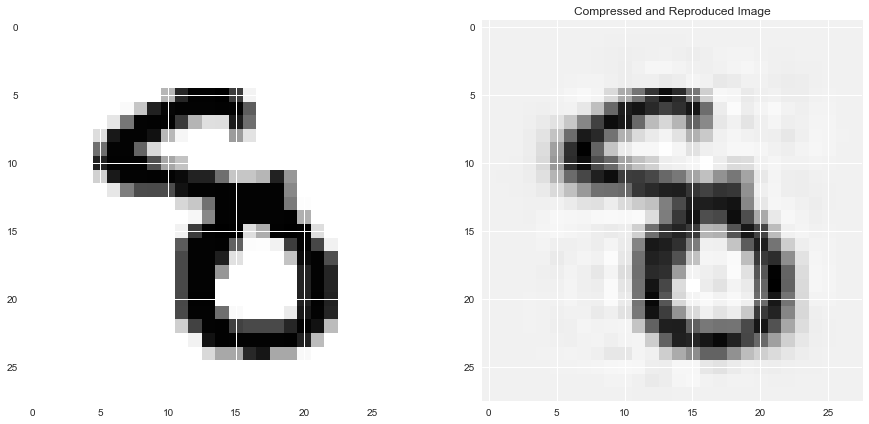

In [36]:
image_comparison(50000)

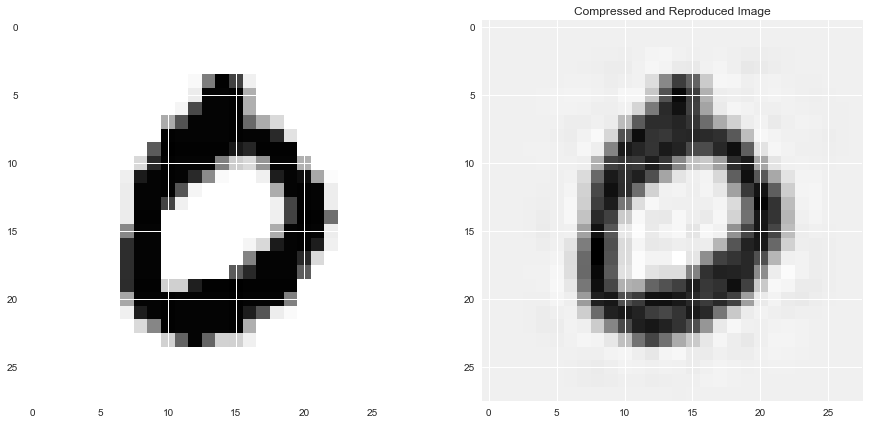

In [37]:
image_comparison(60000)

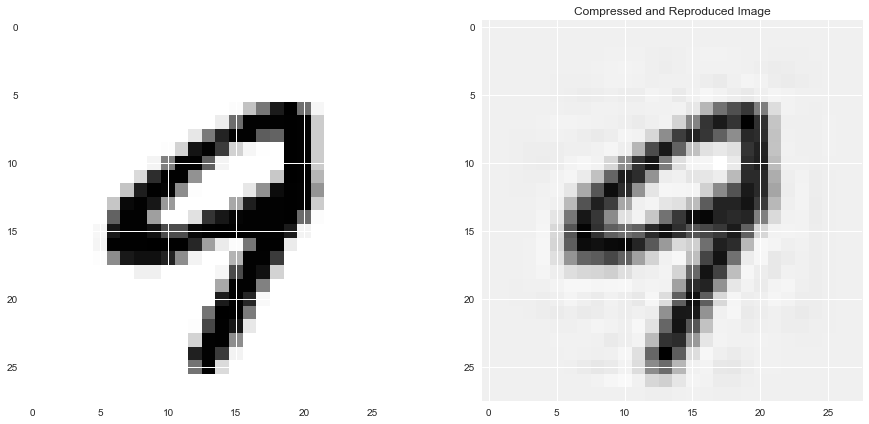

In [38]:
image_comparison(69999)

As we can see in the above images, the reproductions are discernable, albeit slightly more blurry. It seems as if the darkness values are spread across the image somewhat, but the image remains comprehensible. 

#### Trends in the images

The most clear trend is found in comparison of the component images; the first component is most representative of the picture because it contains the most explained variance, whereas each subsequent point, provide diminishing marginal explained variance. By this logic, the cumulative explained variance as the limit of components approaches infinity would be equivalent to the original image. 

## 2. T-SNE
Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

 - A. How does this plot differ from your PCA plot?

 - B. How robust is it to changes in perplexity?

 - C. How robust is it to different learning rate and number of iterations?

In [41]:
#PCA dimensionality reduction
pca = PCA(n_components=154)
X_pca = pca.fit_transform(X)

In [87]:
rows_1000 = np.random.randint(low=0, high = X.shape[0], size = 1000)
 
seed = 17
def tsne_fn(n_components=2, perplexity=50, n_iter=1000, learning_rate=200, verbose=1, random_state=seed, rows=rows_1000):
    
    tsne_ = TSNE(n_components=n_components, perplexity=perplexity, n_iter=n_iter, learning_rate=learning_rate, 
                verbose=verbose, random_state=random_state)
    tsne_results = tsne_.fit_transform(X[rows])
    df_tsne =pd.DataFrame(tsne_results, columns=["comp1","comp2"])
    df_tsne['label'] = y[rows]
    
    return df_tsne

In [88]:
#defines a static tsne dataframe
tsne_df = tsne_fn()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.023s...
[t-SNE] Computed neighbors for 1000 samples in 1.612s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.947743
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.840237
[t-SNE] Error after 1000 iterations: 0.983423


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.022s...
[t-SNE] Computed neighbors for 1000 samples in 1.656s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.910003
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.859749
[t-SNE] Error after 1000 iterations: 1.066061


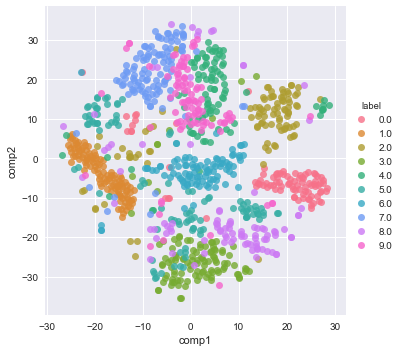

In [53]:
sns.lmplot(x='comp1', y='comp2', data= tsne_fn(), hue='label', fit_reg=False)

### A. How does this plot differ from the PCA plot?

This plot differs from the PCA plot in that it is representing something fundamentally different.

The objective of PCA is to perform singular value decomposition, projecting data onto variance maximizing axes. The clusters are more easily identifieable by the computer, but not necessarily by the human eye. This is evident in the PCA plot of the first two components shown in the previous question

TSNE is intended to reduce large multivariate datasets onto two dimensional planes in a way that creates visible clustering. This is so that users can get a visual approximation of their clustering performance. The data above is seperated in this way. Whereas there is little to no spacing between clusters in the PCA plot (they are actually stacked on top of one another for the most part,) TSNE makes an attempt to parse out the different clusters on a 2D plane. 

### B. How robust is it to changes in perplexity? 

To get a feel for the robustness to changes in perplexity, I'll create a series of graphs with varied perplexity, all other parameters held equal. 

In [51]:
#creates a list of varied perplexity
perp_list = [20,30,40,50]

#creates a list of varied learning rates
learning_rates = [200,300,400,500]

#creates a list of varied numbers of iterations
iteration_list = [400, 600, 800]


Now I will iterate through the perplexity list, updating the parameter and plotting it sequentially:

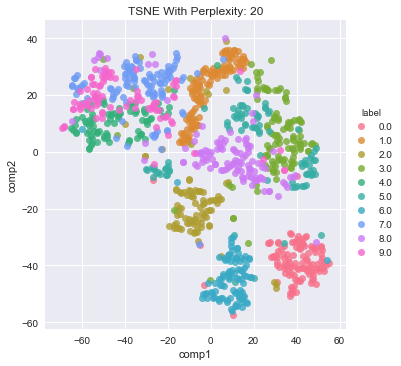

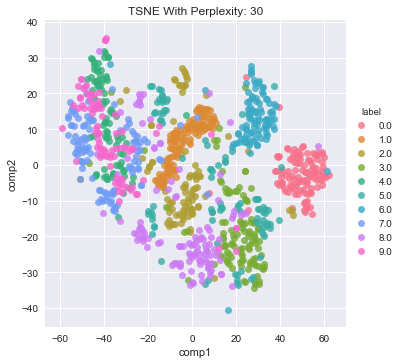

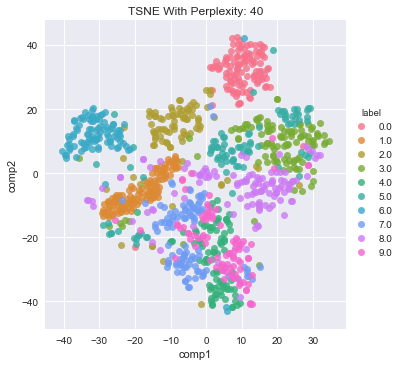

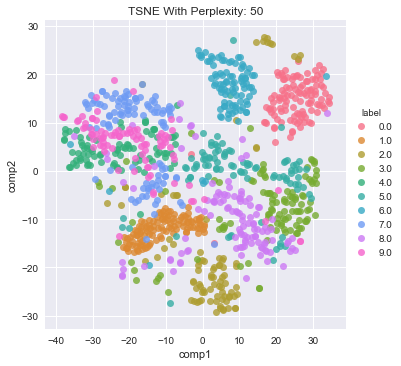

In [97]:
#varies perplexity

for i in perp_list:
    
    sns.lmplot(x='comp1', y='comp2', data= tsne_fn(perplexity=i, verbose=0), hue='label', fit_reg=False)
    plot_title = "TSNE With Perplexity: " + str(i)
    plt.title(plot_title)

As we can see, variations in TSNE do produce noticeable changes in the plot. 
That said, the SKlearn documentation mentions that " The choice (of perplexity) is not extremely critical since t-SNE is quite insensitive to this parameter."

This begs the question, why does perplexity seem to have such a large effect on this dataset? I think the answer lies in the feature size. We have a dataset with 784 features and a sample size of 1000. So perplexity (which cannot exceed the numbers of degrees of freedom within a dataset) is still sizeably relevant. Were the dataset several times larger, I'd imagine that perplexity would yield a less marked change in TSNE. 

### C. How robust is it to different learning rate and number of iterations?

Below I go through the same process of iterating through varied learning rates and number of tsne iterations.

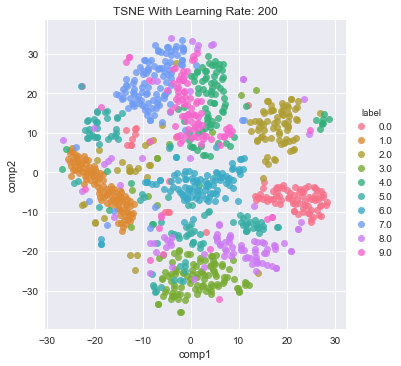

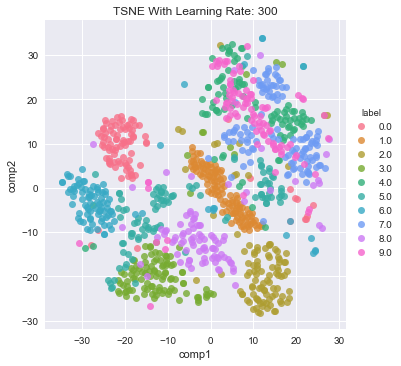

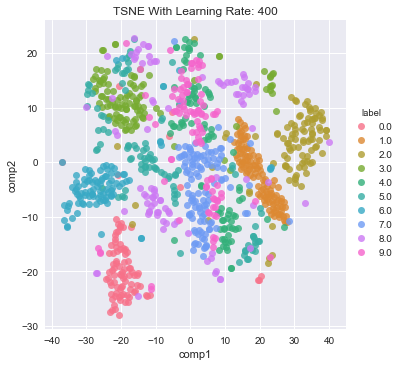

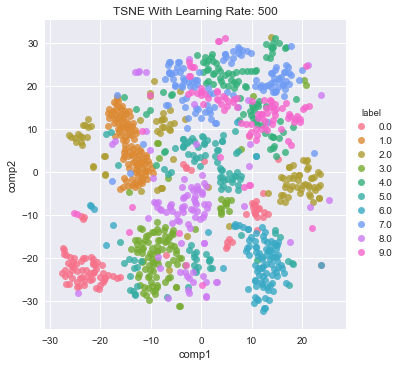

In [56]:
#varies Learning Rates

for i in learning_rates:
    sns.lmplot(x='comp1', y='comp2', data= tsne_fn(learning_rate=i, verbose=0), hue='label', fit_reg=False)
    plot_title = "TSNE With Learning Rate: " + str(i)
    plt.title(plot_title)

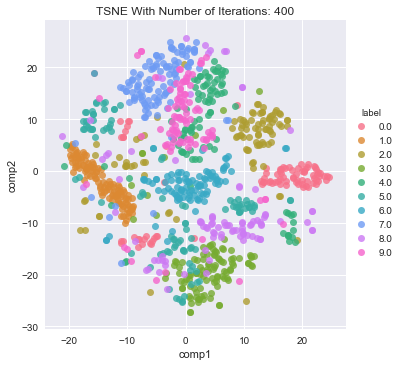

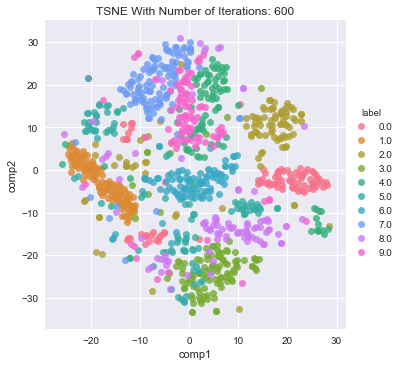

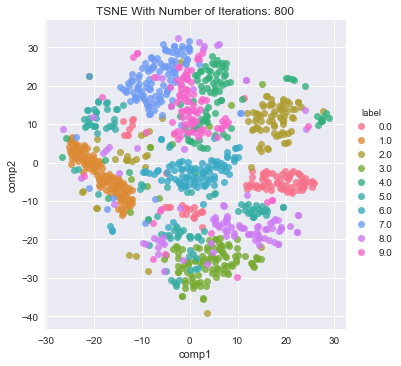

In [57]:
#varies Number of Iterations

for i in iteration_list:
    sns.lmplot(x='comp1', y='comp2', data= tsne_fn(n_iter=i, verbose=0), hue='label', fit_reg=False)
    plot_title = "TSNE With Number of Iterations: " + str(i)
    plt.title(plot_title)

As we can see, learning rate can have a profound effect on the clustering distributions, whereas learning rate makes little to no difference. 
It seems as if TSNE is extremely robust to learning rate, but not very robust to changes in the learning rate (likely within reasonable bounds.) 

## 3. K Means Clustering
Perform k-means clustering:

 - A. How did you choose k?

 - B. How did you evaluate your clustering?

 - C. Visualize your clusters using t-sne

 - D. Did you scale your data?

 - E. How robust is your clustering?

### A. How did you choose K?

There are 10 handwritten digits that we want the computer to identify. It would be counterproductive (for our purposes) then, to try and find anything but 10 centroids then. 

Therefore, K=10.

In [63]:
def kmeans_predictions(data):
    kmeans = KMeans(n_clusters=10, n_init=10, n_jobs=-1)
    kmeans.fit(data)
    return kmeans.predict(data)

In [98]:
#performs the k means clustering
sk_clusters = kmeans_predictions(X)

### B. Cluster Evaluation

In [106]:
f1_score(tsne_df["label"], sk_clusters[rows_1000], average='micro')

0.106

I've evaluated the kmeans predictions using an f1 score. As you can see, the predictions are pretty poor. 

### C. TSNE Visualization

In [ ]:
sns.lmplot(x='comp1', y='comp2', data=tsne_df, hue=sk_clusters, fit_reg=False)

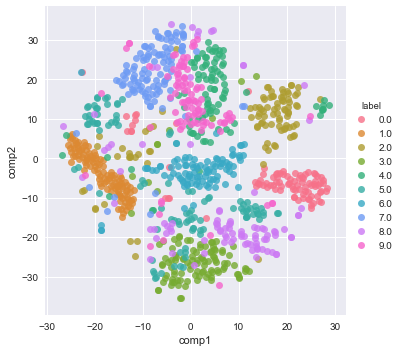

In [67]:
sns.lmplot(x='comp1', y='comp2', data=tsne_df, hue="label", fit_reg=False)

### D. Did you scale your data?

No I didn't. It seemed unimportant (and potentially hazardous) for a couple of reasons.

1. All of the data is on the same spectrum. This isn't a case of comparing miles to inches, the darkness gradient is standardized already.

2. Location is important. As with latitudonal and longitudonal data, it is important to be able to make side by side comparisons (and comparisons of magnitude) between pixels at the same location across images. For this reason, Scaling the data could detract from discernability. 

3. Scaling means extra work. And I don't want to do it unless I have to. 

### E. How Robust is your Clustering?

## 4. Hierarchichal Clustering
Perform hierarchical clustering:
 - A. Plot your dendrogram

 - B. How many clusters seem reasonable based off your graph?

 - C. How does your dendrogram change with different linkage methods?

### A. Dendrogram Plots:

Here I plot dendromgrams using varied linkage methods: complete, single, ward, and centroid. 

In [75]:
#create a random set of rows for the dendrogram to reduce computation time
rows = np.random.randint(low=0, high = X.shape[0], size = 150)

#defines the dendrogram function where the linkage method is a parameter
def dendrogramz(method):
    Z = linkage(X[rows], method)
    plt.figure(figsize=(20, 12))
    _ = dendrogram(Z)
    plot_title = "Dendrogram using " + method + " Linkage"
    plt.title(plot_title)

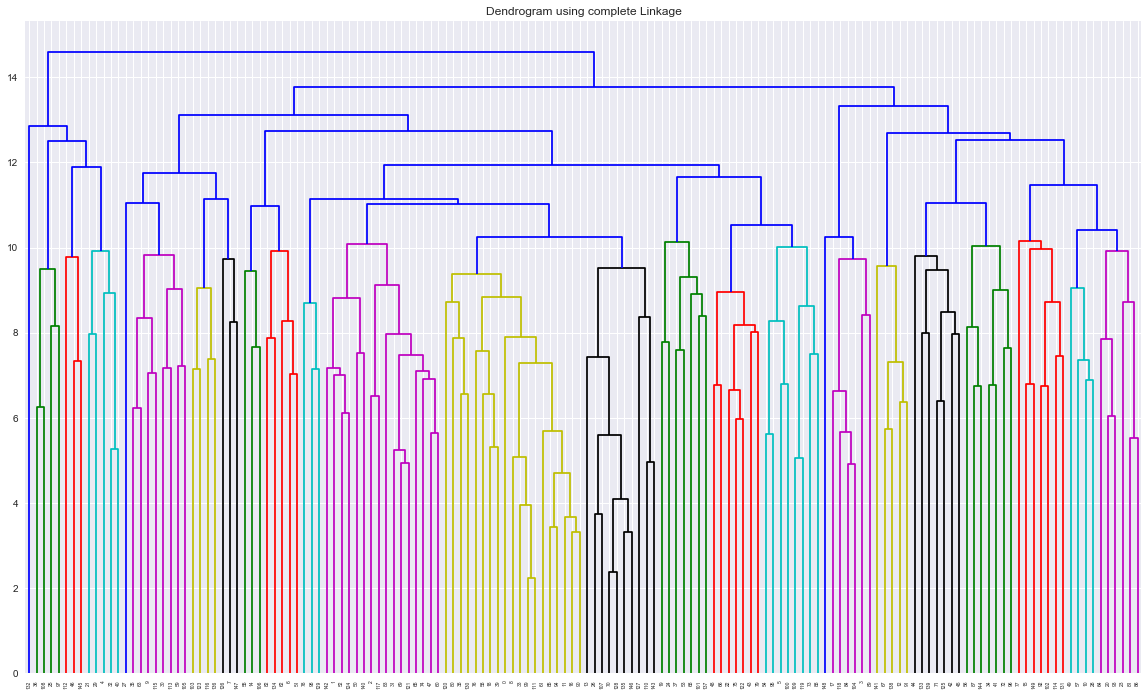

In [76]:
dendrogramz("complete")

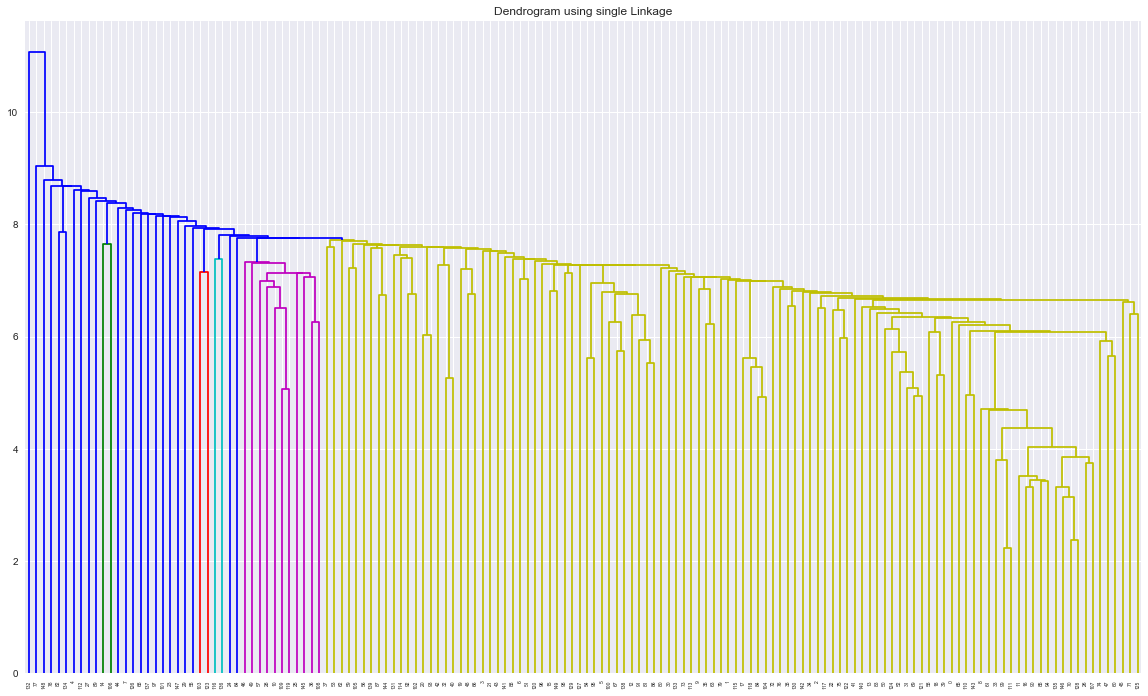

In [77]:
dendrogramz("single")

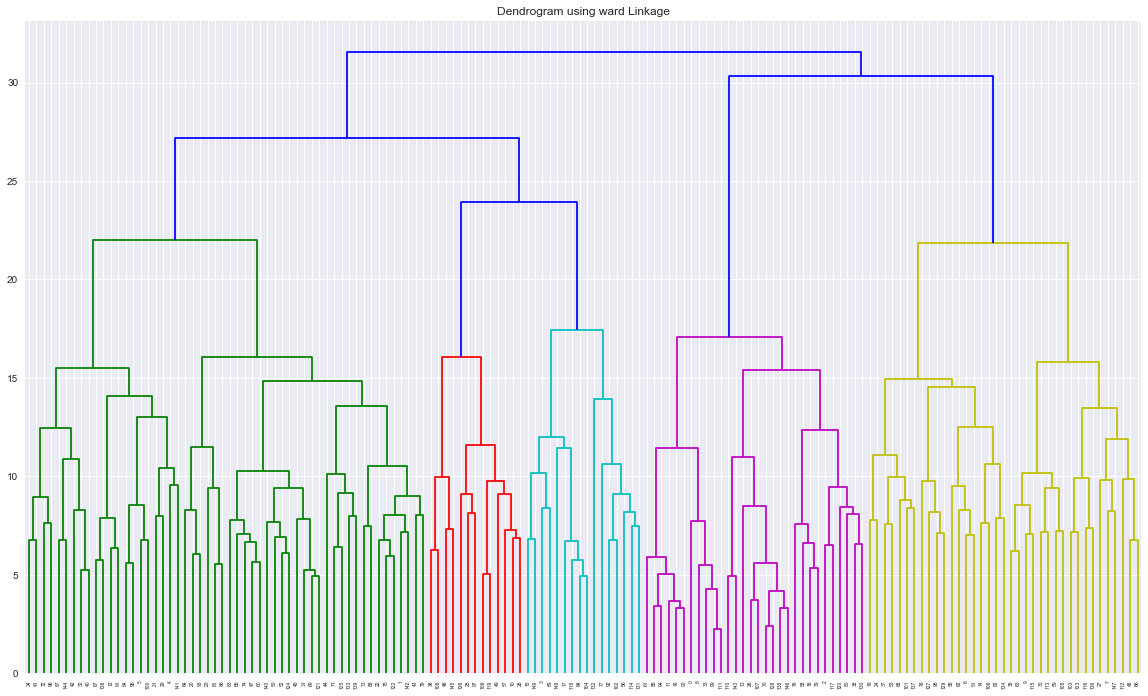

In [78]:
dendrogramz("ward")

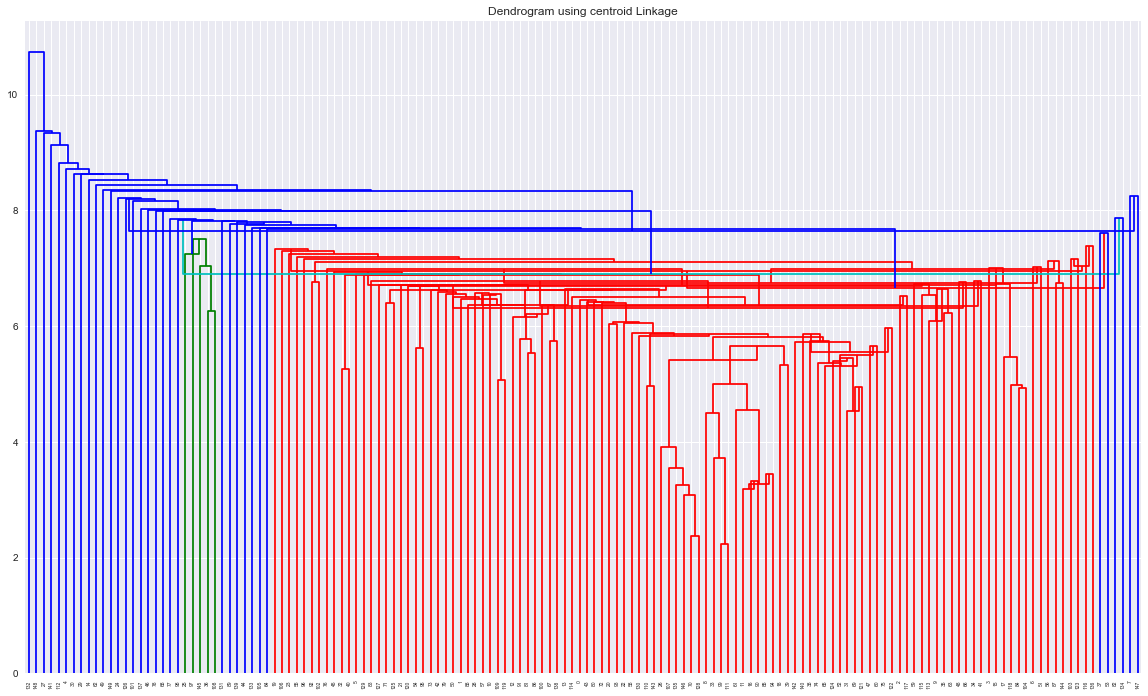

In [79]:
dendrogramz("centroid")

### B. How many clusters seem reasonable based off of these graphs?

The number of obvious clusters seems to vary largely based off of the linkage method. I find the most clear linkage method to be the ward method, which produces 5 uniquely colored clusters in the above iteration. That said, each of the 5 could easily be broken into 2 subsets were the coloration begin one or two branch levels further down, making 10 clusters. It is understandable that the computer would cluster some of them so closely given how much a handwritten 0 may resemble an 8, or a 4 could resemble a 9. Other linkage methods are more difficult to interpret and provide significantly different clusterings. 

### C. How does your dendrogram vary with different linkage methods?

The difference between linkage methods is visibly tremendous. The ward method seems to be the only method that consistently groups clusters together, whereas other methods will frequently seperate members of the same cluster. This makes the clustering extremely difficult to see. Furthermore, the centroid method seems to consistently produce the most unbalanced cluster sizes. 